In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
datasets = {
    "Spherical Clusters": pd.read_csv('./Datasets/Speherical_Clusters.csv'),
    "Moon Clusters": pd.read_csv('./Datasets/moons_Clusters.csv'),
    "Nested Clusters": pd.read_csv('./Datasets/Nested_Clusters.csv'),
    # "Hierarchical Structure": pd.read_csv('./Datasets/zoo.csv')
    "Hierarchical Structure": pd.read_csv('./Datasets/Mall_Customers.csv')
}

#### Extracting Truth Labels from each of the dataset

In [3]:
true_labels_spherical = datasets["Spherical Clusters"]['Cluster'].values  
true_labels_moon = datasets["Moon Clusters"]['Cluster'].values  
true_labels_nested = datasets["Nested Clusters"]['Cluster'].values

#### Function to plot the results of the DBSCAN as well as to calculate the Random Index and Silhouette Score
#### Eps value is found through the elbow method, and the best min_samples to use is found by looping through 3-10. 
#### Only the graph with the best metrics (measured by the ARI and Silhouette Score)

In [4]:
def plotDBSCAN(data, title, true_labels=None):
    min_samples_range = range(3, 11)

    best_silhouette = -1
    best_ari = -1
    best_min_samples = None
    best_labels = None

    for min_samples in min_samples_range:
        
        nbrs = NearestNeighbors(n_neighbors=min_samples).fit(data)
        distances, _ = nbrs.kneighbors(data)
        k_distances = np.sort(distances[:, -1], axis=0)
        
        kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
        elbow_index = kneedle.elbow
        
        eps = k_distances[elbow_index]

        print(f"eps value used = {eps:.4f}")
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        unique_labels = set(labels)
        num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        num_noise = list(labels).count(-1)

        print(f"min_samples: {min_samples}, Number of clusters: {num_clusters}, Number of outliers: {num_noise}")

        if num_clusters > 1:
            silhouette_avg = silhouette_score(data, labels)
            print(f'Silhouette Score: {silhouette_avg:.4f}')
        else:
            silhouette_avg = -1  

        if true_labels is not None:
            ari = adjusted_rand_score(true_labels, labels)
            print(f'Adjusted Rand Index (ARI): {ari:.4f}')
        else:
            ari = -1  

        if true_labels is not None:
            if silhouette_avg > best_silhouette and ari > best_ari:
                best_silhouette = silhouette_avg
                best_ari = ari
                best_min_samples = min_samples
                best_labels = labels

    print(f"\nBest min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette:.4f}, Best ARI: {best_ari:.4f}\n")

    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

    plt.scatter(data[best_labels == -1][:, 0], data[best_labels == -1][:, 1], c='black', label='Noise', s=30)

    unique_labels = set(best_labels)
    for label in unique_labels:
        if label != -1:
            plt.scatter(data[best_labels == label][:, 0], data[best_labels == label][:, 1],
                        c=colors[label % len(colors)], label=f'Cluster {label}', s=30)

    plt.title(title + f" (Best min_samples = {best_min_samples})")
    plt.legend(loc='best')
    plt.show()


#### DBSCAN on Spherical Clusters

eps value used = 0.2058
min_samples: 3, Number of clusters: 7, Number of outliers: 14
Silhouette Score: 0.5332
Adjusted Rand Index (ARI): 0.9690
eps value used = 0.1939
min_samples: 4, Number of clusters: 4, Number of outliers: 26
Silhouette Score: 0.7024
Adjusted Rand Index (ARI): 0.9643
eps value used = 0.2564
min_samples: 5, Number of clusters: 4, Number of outliers: 10
Silhouette Score: 0.7139
Adjusted Rand Index (ARI): 0.9865
eps value used = 0.1877
min_samples: 6, Number of clusters: 4, Number of outliers: 36
Silhouette Score: 0.6919
Adjusted Rand Index (ARI): 0.9501
eps value used = 0.2160
min_samples: 7, Number of clusters: 4, Number of outliers: 28
Silhouette Score: 0.7003
Adjusted Rand Index (ARI): 0.9615
eps value used = 0.3289
min_samples: 8, Number of clusters: 4, Number of outliers: 4
Silhouette Score: 0.7091
Adjusted Rand Index (ARI): 0.9947
eps value used = 0.2133
min_samples: 9, Number of clusters: 4, Number of outliers: 37
Silhouette Score: 0.6912
Adjusted Rand Index 

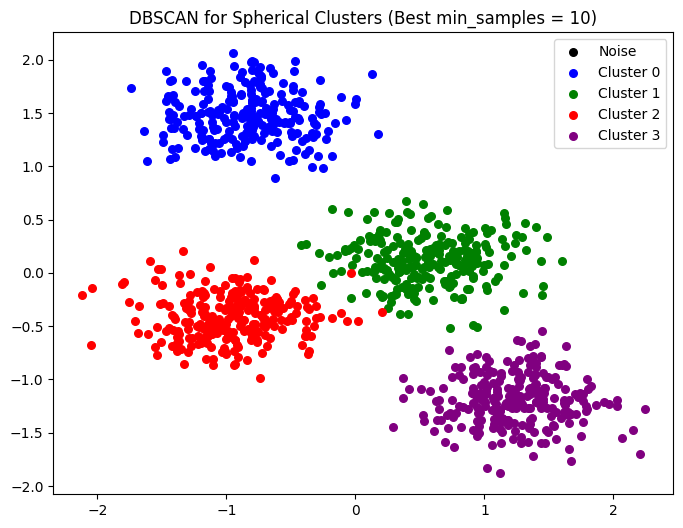

In [6]:
scaler = StandardScaler()
data = datasets["Spherical Clusters"] 
data = scaler.fit_transform(data)
plotDBSCAN(data, "DBSCAN for Spherical Clusters", true_labels=true_labels_spherical)


#### DBSCAN on Moon Clusters

eps value used = 0.1644
min_samples: 3, Number of clusters: 4, Number of outliers: 32
Silhouette Score: 0.2383
Adjusted Rand Index (ARI): 0.9184
eps value used = 0.1720
min_samples: 4, Number of clusters: 4, Number of outliers: 41
Silhouette Score: 0.2399
Adjusted Rand Index (ARI): 0.9032
eps value used = 0.2908
min_samples: 5, Number of clusters: 2, Number of outliers: 4
Silhouette Score: 0.4882
Adjusted Rand Index (ARI): 0.9920
eps value used = 0.3229
min_samples: 6, Number of clusters: 2, Number of outliers: 2
Silhouette Score: 0.4470
Adjusted Rand Index (ARI): 0.9960
eps value used = 0.3439
min_samples: 7, Number of clusters: 2, Number of outliers: 2
Silhouette Score: 0.4470
Adjusted Rand Index (ARI): 0.9960
eps value used = 0.3287
min_samples: 8, Number of clusters: 2, Number of outliers: 4
Silhouette Score: 0.4348
Adjusted Rand Index (ARI): 0.9921
eps value used = 0.2792
min_samples: 9, Number of clusters: 2, Number of outliers: 9
Silhouette Score: 0.4778
Adjusted Rand Index (ARI

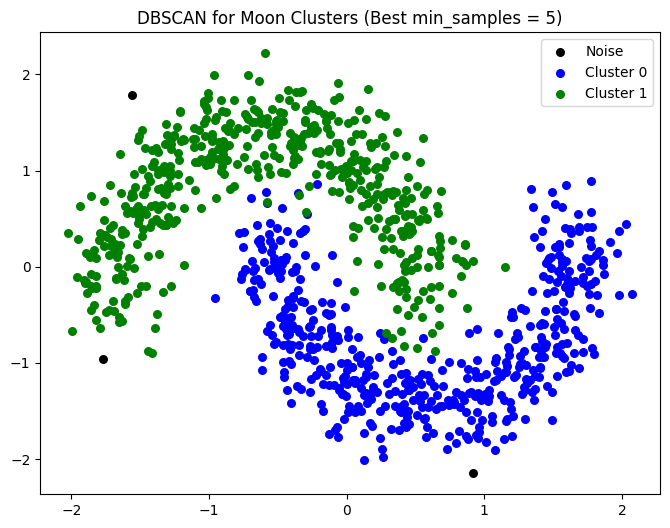

In [7]:
scaler = StandardScaler()
data = datasets["Moon Clusters"] 
data = scaler.fit_transform(data)

plotDBSCAN(data, "DBSCAN for Moon Clusters", true_labels=true_labels_moon)

#### DBSCAN on Nested Clusters

eps value used = 0.2774
min_samples: 3, Number of clusters: 10, Number of outliers: 32
Silhouette Score: 0.1324
Adjusted Rand Index (ARI): 0.8823
eps value used = 0.4121
min_samples: 4, Number of clusters: 3, Number of outliers: 13
Silhouette Score: 0.2321
Adjusted Rand Index (ARI): 0.9811
eps value used = 0.4729
min_samples: 5, Number of clusters: 3, Number of outliers: 12
Silhouette Score: 0.2323
Adjusted Rand Index (ARI): 0.9825
eps value used = 0.5593
min_samples: 6, Number of clusters: 3, Number of outliers: 5
Silhouette Score: 0.2305
Adjusted Rand Index (ARI): 0.9926
eps value used = 0.6579
min_samples: 7, Number of clusters: 3, Number of outliers: 2
Silhouette Score: 0.2167
Adjusted Rand Index (ARI): 0.9970
eps value used = 0.3759
min_samples: 8, Number of clusters: 4, Number of outliers: 53
Silhouette Score: 0.2584
Adjusted Rand Index (ARI): 0.8749
eps value used = 0.3947
min_samples: 9, Number of clusters: 4, Number of outliers: 54
Silhouette Score: 0.1802
Adjusted Rand Index 

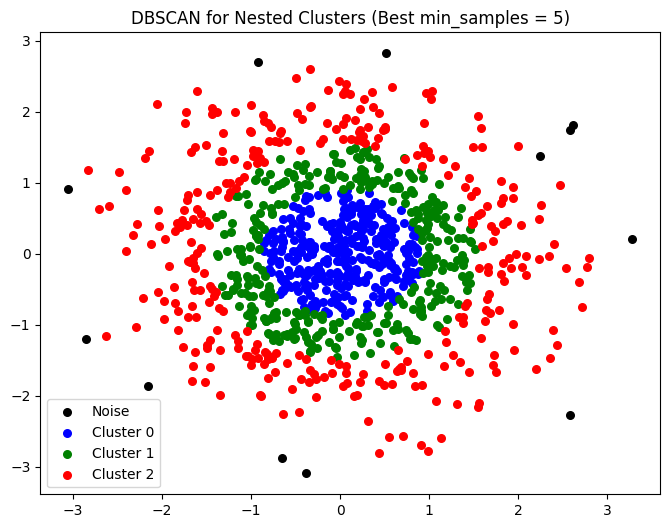

In [8]:
scaler = StandardScaler()
data = datasets["Nested Clusters"] 
data = scaler.fit_transform(data)

plotDBSCAN(data, "DBSCAN for Nested Clusters", true_labels=true_labels_nested)


#### DBSCAN on Hierarchical Structure

Number of clusters: 4


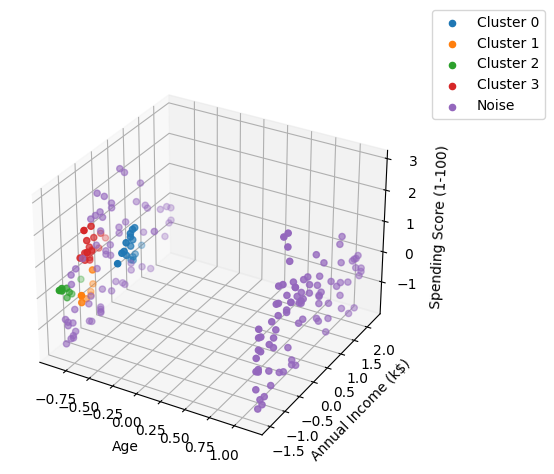

Silhouette Score: -0.2986


In [9]:
data = datasets["Hierarchical Structure"]

feature_columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[feature_columns])

dbscan = DBSCAN(eps=0.5, min_samples=7)
labels = dbscan.fit_predict(data_scaled)

unique_labels = set(labels)

num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f'Number of clusters: {num_clusters}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
    cluster_data = data_scaled[labels == label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], 
               label=f'Cluster {label}' if label != -1 else 'Noise')
    
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.legend(loc='center left', bbox_to_anchor=(1.05, 1))  
plt.tight_layout()  
plt.show()

silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")